<h1><span style="color:blue"> Busca y descarga el conjunto de datos “Vertebral Column Data Set” del
repositorio UCI Machine Learning. Tiene los datos de un problema de
clasificación multiclase. Cárgalo adecuadamente en un Pandas
DataFrame. </span></h1>

Este dataset tienen datos sobre gente con problems de columna veterbral
Problema de clasificacion binario.
Pero tambien viene un dataset multiclase.Lo que cambia es la variable independiente.

In [1]:
import pandas as pd
from pandas import read_csv 
from sklearn.tree import DecisionTreeClassifier, plot_tree 
import time, random 
from sklearn.model_selection import train_test_split 

from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score  

seed=random.seed(time.time()) 

In [2]:
filename = 'column_3C.dat'  

col_names=['pelvic_incidence numeric','pelvic_tilt numeric','lumbar_lordosis_angle numeric','sacral_slope numeric','pelvic_radius numeric','degree_spondylolisthesis numeric','class']

data = read_csv(filename, names=col_names)

data.head()

,pelvic_incidence numeric,pelvic_tilt numeric,lumbar_lordosis_angle numeric,sacral_slope numeric,pelvic_radius numeric,degree_spondylolisthesis numeric,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia


In [3]:
class_distribution = data.groupby('class').size()
print(class_distribution)

class
Hernia                60
Normal               100
Spondylolisthesis    150
dtype: int64


<h1><span style="color:blue"> Realiza el preprocesamiento más adecuado para los datos.  </span></h1>

Este es un modelo que **NO** esta basado en distancias entonces el<span style="color:red">   ESCALADO DE DATOS </span> es un paso que nos podemos evitar perfectamente.

Tampoco es necesario una transformacion de variables <span style="color:red">CATEGORICAS</span> a <span style="color:red">NUMERICAS. </span> En **SCALER** si es necesario pero aqui no hace falta porque requiere variables numericas

Entonces vamos directamente a generar el objeto de la clase DesicionTree.

In [4]:
X = data[data.columns[:-1]] 
Y = data['class']  

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=seed) 

<h1><span style="color:blue"> Entrena un modelo de Árbol de decisión para clasificación y evalúa su
rendimiento. </span></h1>

Este modelo ya corre con el <span style="color:red">INDICE DE GINNI</span>, el criterio para elegir por defecto la pureza o impureza de las particiones generadas(La homogeneidad)

Sin embargo; el criterio tambien puede ser <span style="color:red"> ENTROPIA </span>

Solo tendría que agregar el parámetro  <span style="color:blue"> criterion:{'gini', 'entropy'} </span>

In [6]:
model = DecisionTreeClassifier().fit(X_train, y_train) 

Una vez generado el arbol solo tenemos que hacer el predict con los patrones de test y ver la métrica de rendimiento.

In [7]:
y_pred = model.predict(X_test) 

In [8]:
bacc =  balanced_accuracy_score(y_pred, y_test) 
acc =  accuracy_score(y_pred, y_test) 
cm =  confusion_matrix(y_pred, y_test)  

Una vez el arbol entrenado tien la posibilidad de ser visualizado con PLOT

[Text(0.6767857142857143, 0.95, 'X[5] <= 15.031\ngini = 0.613\nsamples = 217\nvalue = [41, 65, 111]'),
 Text(0.46785714285714286, 0.85, 'X[4] <= 118.455\ngini = 0.516\nsamples = 107\nvalue = [41, 62, 4]'),
 Text(0.2785714285714286, 0.75, 'X[3] <= 43.715\ngini = 0.518\nsamples = 44\nvalue = [27, 14, 3]'),
 Text(0.15714285714285714, 0.65, 'X[4] <= 113.523\ngini = 0.372\nsamples = 34\nvalue = [26, 7, 1]'),
 Text(0.12857142857142856, 0.55, 'gini = 0.0\nsamples = 14\nvalue = [14, 0, 0]'),
 Text(0.18571428571428572, 0.55, 'X[3] <= 35.268\ngini = 0.515\nsamples = 20\nvalue = [12, 7, 1]'),
 Text(0.11428571428571428, 0.45, 'X[4] <= 114.386\ngini = 0.375\nsamples = 16\nvalue = [12, 4, 0]'),
 Text(0.05714285714285714, 0.35, 'X[0] <= 37.987\ngini = 0.444\nsamples = 3\nvalue = [1, 2, 0]'),
 Text(0.02857142857142857, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.08571428571428572, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.17142857142857143, 0.35, 'X[1] <= 9.448\ngin

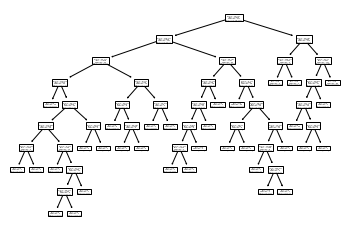

In [9]:
plot_tree(model)

In [10]:
print(bacc, acc) 
print(cm)

0.8111721611721613 0.8387096774193549
[[10  4  0]
 [ 8 30  1]
 [ 1  1 38]]


Sin ningún metodo de poda el rendimiento no es muy alto.

<h1><span style="color:blue"> Realiza una comparativa del rendimiento del modelo utilizando las
distintas estrategias de poda estudiadas. </span></h1>

1- Con estrategias de PODA-----> PRE-PODA / POST-PODA/ y con las dos. Y en que casos funciona mejor el modelo.

<span style="color:blue"> Pre-poda </span>

La pre-poda consiste en limitar la extension del arbol. Realizo un bucle for para medir el rendimiento.



In [11]:
cols = ['Splitter','Criterion','Max_Depth','Balanced Accuracy','Accuracy', 'Confusion Matrix']

df_2 = pd.DataFrame(columns=cols)

max_depth = 6

criterio = ['gini','entropy']

splitter = ['best','random']


for c in criterio:
    
    for s in splitter:
    
        for i in range(1,max_depth):
       
            model = DecisionTreeClassifier(max_depth=i, criterion = c, splitter=s).fit(X_train, y_train)

            y_pred = model.predict(X_test) 

            bacc =  balanced_accuracy_score(y_pred, y_test) 
            acc =  accuracy_score(y_pred, y_test) 
            cm =  confusion_matrix(y_pred, y_test) 

            new_row = {'Splitter':s,'Criterion':c,'Max_Depth':i, 'Balanced Accuracy':bacc, 'Accuracy':acc, 'Confusion Matrix':cm}

            df_2 = df_2.append(new_row, ignore_index=True) 

df_2

c:\users\mauro.cespedesaraya\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_12060\2163703751.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = df_2.append(new_row, ignore_index=True)
C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_12060\2163703751.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = df_2.append(new_row, ignore_index=True)
C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_12060\2163703751.py:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = df_2.append(n

,Splitter,Criterion,Max_Depth,Balanced Accuracy,Accuracy,Confusion Matrix
0,best,gini,1,0.811254,0.784946,"[[0, 0, 0], [18, 35, 1], [1, 0, 38]]"
1,best,gini,2,0.700733,0.752688,"[[9, 12, 1], [9, 23, 0], [1, 0, 38]]"
2,best,gini,3,0.815963,0.849462,"[[13, 7, 0], [5, 28, 1], [1, 0, 38]]"
3,best,gini,4,0.811503,0.849462,"[[12, 6, 1], [6, 29, 0], [1, 0, 38]]"
4,best,gini,5,0.824786,0.860215,"[[12, 5, 1], [6, 30, 0], [1, 0, 38]]"
5,random,gini,1,0.419355,0.419355,"[[0, 0, 0], [0, 0, 0], [19, 35, 39]]"
6,random,gini,2,0.683214,0.731183,"[[4, 2, 1], [11, 26, 0], [4, 7, 38]]"
7,random,gini,3,0.593305,0.602151,"[[0, 0, 0], [14, 21, 4], [5, 14, 35]]"
8,random,gini,4,0.748392,0.806452,"[[8, 7, 0], [10, 28, 0], [1, 0, 39]]"
9,random,gini,5,0.697436,0.688172,"[[11, 4, 0], [7, 23, 9], [1, 8, 30]]"


Con la prepoda el rendimiento aumenta considerablemente hasta un 87.09%

La mejor accuracy la obtengo con:

- splitter = best
- Criterio = gini
- max_depth = 3

<span style="color:blue"> Post-poda  </span>

Se implementa mediante el parametro <span style="color:blue"> ccp_alpha </span>

Una vez construido el árbol, busca las ramas que son menos informativas y tienen más complejidad y las analiza , después las poda.

Es un valor numérico positivo que se coloca como un umbral, y aqullas ramas que sobrepasen las poda.

In [12]:
cols = ['Umbral_post-prunning','Balanced Accuracy','Accuracy', 'Confusion Matrix']

df_2 = pd.DataFrame(columns=cols)

ccp_alpha = 10


for c in range(ccp_alpha):
      
    model = DecisionTreeClassifier(ccp_alpha = c).fit(X_train, y_train)

    y_pred = model.predict(X_test) 

    bacc =  balanced_accuracy_score(y_pred, y_test) 
    acc =  accuracy_score(y_pred, y_test) 
    cm =  confusion_matrix(y_pred, y_test) 

    new_row = {'Umbral_post-prunning':c, 'Balanced Accuracy':bacc, 'Accuracy':acc, 'Confusion Matrix':cm}

    df_2 = df_2.append(new_row, ignore_index=True) 

df_2

C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_12060\3461467105.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = df_2.append(new_row, ignore_index=True)
c:\users\mauro.cespedesaraya\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_12060\3461467105.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = df_2.append(new_row, ignore_index=True)
c:\users\mauro.cespedesaraya\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:

,Umbral_post-prunning,Balanced Accuracy,Accuracy,Confusion Matrix
0,0,0.751180,0.784946,"[[9, 4, 1], [9, 27, 1], [1, 4, 37]]"
1,1,0.419355,0.419355,"[[0, 0, 0], [0, 0, 0], [19, 35, 39]]"
2,2,0.419355,0.419355,"[[0, 0, 0], [0, 0, 0], [19, 35, 39]]"
3,3,0.419355,0.419355,"[[0, 0, 0], [0, 0, 0], [19, 35, 39]]"
4,4,0.419355,0.419355,"[[0, 0, 0], [0, 0, 0], [19, 35, 39]]"
5,5,0.419355,0.419355,"[[0, 0, 0], [0, 0, 0], [19, 35, 39]]"
6,6,0.419355,0.419355,"[[0, 0, 0], [0, 0, 0], [19, 35, 39]]"
7,7,0.419355,0.419355,"[[0, 0, 0], [0, 0, 0], [19, 35, 39]]"
8,8,0.419355,0.419355,"[[0, 0, 0], [0, 0, 0], [19, 35, 39]]"
9,9,0.419355,0.419355,"[[0, 0, 0], [0, 0, 0], [19, 35, 39]]"


Parece ser que las estrategias de post poda por si mismas no mejora el rendimiento de mi modelo.

<span style="color:blue"> De forma simultanea. </span>

In [13]:
cols = ['Umbral_post-prunning','Splitter','Criterion','Max_Depth','Balanced Accuracy','Accuracy', 'Confusion Matrix']

df_2 = pd.DataFrame(columns=cols)

max_depth = 6

criterio = ['gini','entropy']

splitter = ['best','random']

ccp_alpha = 3


for c in criterio:
    
    for s in splitter:
        
        for x in range(ccp_alpha):
    
            for i in range(1,max_depth):

                model = DecisionTreeClassifier(max_depth=i, criterion = c, splitter=s, ccp_alpha = x ).fit(X_train, y_train)

                y_pred = model.predict(X_test) 

                bacc =  balanced_accuracy_score(y_pred, y_test) 
                acc =  accuracy_score(y_pred, y_test) 
                cm =  confusion_matrix(y_pred, y_test) 

                new_row = {'Umbral_post-prunning':x,'Splitter':s,'Criterion':c,'Max_Depth':i, 'Balanced Accuracy':bacc, 'Accuracy':acc, 'Confusion Matrix':cm}

                df_2 = df_2.append(new_row, ignore_index=True) 

df_2

c:\users\mauro.cespedesaraya\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_12060\1488094694.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = df_2.append(new_row, ignore_index=True)
C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_12060\1488094694.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = df_2.append(new_row, ignore_index=True)
C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_12060\1488094694.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = df_2.append(n

C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_12060\1488094694.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = df_2.append(new_row, ignore_index=True)
c:\users\mauro.cespedesaraya\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:\Users\Mauro.CespedesAraya\AppData\Local\Temp\ipykernel_12060\1488094694.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2 = df_2.append(new_row, ignore_index=True)
c:\users\mauro.cespedesaraya\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:2006: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
C:

,Umbral_post-prunning,Splitter,Criterion,Max_Depth,Balanced Accuracy,Accuracy,Confusion Matrix
0,0,best,gini,1,0.811254,0.784946,"[[0, 0, 0], [18, 35, 1], [1, 0, 38]]"
1,0,best,gini,2,0.700733,0.752688,"[[9, 12, 1], [9, 23, 0], [1, 0, 38]]"
2,0,best,gini,3,0.815963,0.849462,"[[13, 7, 0], [5, 28, 1], [1, 0, 38]]"
3,0,best,gini,4,0.811503,0.849462,"[[12, 6, 1], [6, 29, 0], [1, 0, 38]]"
4,0,best,gini,5,0.838072,0.870968,"[[12, 5, 0], [6, 30, 0], [1, 0, 39]]"
5,1,best,gini,1,0.419355,0.419355,"[[0, 0, 0], [0, 0, 0], [19, 35, 39]]"
6,1,best,gini,2,0.419355,0.419355,"[[0, 0, 0], [0, 0, 0], [19, 35, 39]]"
7,1,best,gini,3,0.419355,0.419355,"[[0, 0, 0], [0, 0, 0], [19, 35, 39]]"
8,1,best,gini,4,0.419355,0.419355,"[[0, 0, 0], [0, 0, 0], [19, 35, 39]]"
9,1,best,gini,5,0.419355,0.419355,"[[0, 0, 0], [0, 0, 0], [19, 35, 39]]"


Realmente la post-poda no aporta nada en este caso. Realmente el mejor rendimiento se obtienen sin la post-poda.